In [1]:
# For mouting 
from google.colab import drive
import torch
import os
import json

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import torch
import os
# Base path

Annots_Path = '/content/drive/MyDrive/BSc_Project/Main_code_folder/TIMOTHY/val_300.json'
import json
import random

# Load the COCO JSON file
with open(Annots_Path, 'r') as f:
    coco_data = json.load(f)

import json
import random

# Load the COCO JSON file
with open(Annots_Path, 'r') as f:
    coco_data = json.load(f)
Collect_image_ids = list(coco_data.keys())
Collect_image_ann = list(coco_data.values())

Test_ = dict(zip(Collect_image_ids, Collect_image_ann))
with open('test.json', 'w') as f:
    json.dump(Test_, f)

with open('test.json', 'r') as test:
    Test_coco_data = json.load(test)

In [3]:
import json
from pathlib import Path
from typing import Tuple

import pandas as pd

DATA_PATH = Path()
images_path = Path("/content/drive/MyDrive/BSc_Project/Val_300/images")

def load_dataset(
    data_path: Path = DATA_PATH,
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Read the COCO style json dataset and transform it into convenient DataFrames
    :return (images_df, targets_df):
        images_df: Columns "image_id" and "file_name"
        targets_df: Columns
            "target_id", "image_id", "xmin", "ymin", "xmax", "ymax", "label_id"
    """
    annotations_path = '/content/drive/MyDrive/BSc_Project/Main_code_folder/TIMOTHY/val_300.json'

    with open(annotations_path, "r") as f:
        targets_json = json.load(f)

    images_df = pd.DataFrame.from_records(targets_json["images"])
    images_df.rename(columns={"id": "image_id"}, inplace=True)
    images_df = images_df[["image_id", "file_name"]]

    targets_df = pd.DataFrame.from_records(targets_json["annotations"])
    targets_df[["xmin", "ymin", "w", "h"]] = targets_df["bbox"].tolist()
    targets_df["xmax"] = targets_df["xmin"] + targets_df["w"]
    targets_df["ymax"] = targets_df["ymin"] + targets_df["h"]
    targets_df.reset_index(inplace=True)
    targets_df.rename(
        columns={"index": "target_id", "category_id": "label_id"}, inplace=True
    )
    targets_df = targets_df[
        ["target_id", "image_id", "label_id", "xmin", "ymin", "xmax", "ymax"]
    ]

    return images_df, targets_df

images_df, targets_df = load_dataset(DATA_PATH)

In [4]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/BSc_Project/Main_code_folder/TIMOTHY/preds_df_faster_medical.csv")
preds_df = data
print(preds_df)

     Unnamed: 0  pred_id  image_id  label_id        xmin        ymin  \
0             0        0         1         1   81.019051  118.619362   
1             1        1         2         1  211.590256  128.473343   
2             2        2         2         1  176.756439  141.900314   
3             3        3         2         1  436.286530  109.935310   
4             4        4         3         1  155.735779  149.703842   
..          ...      ...       ...       ...         ...         ...   
714         714      714       299         1  361.220520  241.604340   
715         715      715       300         1  492.387543  194.344894   
716         716      716       300         1   42.623508  130.484741   
717         717      717       300         1  204.823456   37.226707   
718         718      718       300         1  357.373169  146.806686   

           xmax        ymax     score  
0    339.983803  336.566750  0.951372  
1    445.292389  429.909988  0.916277  
2    383.872955

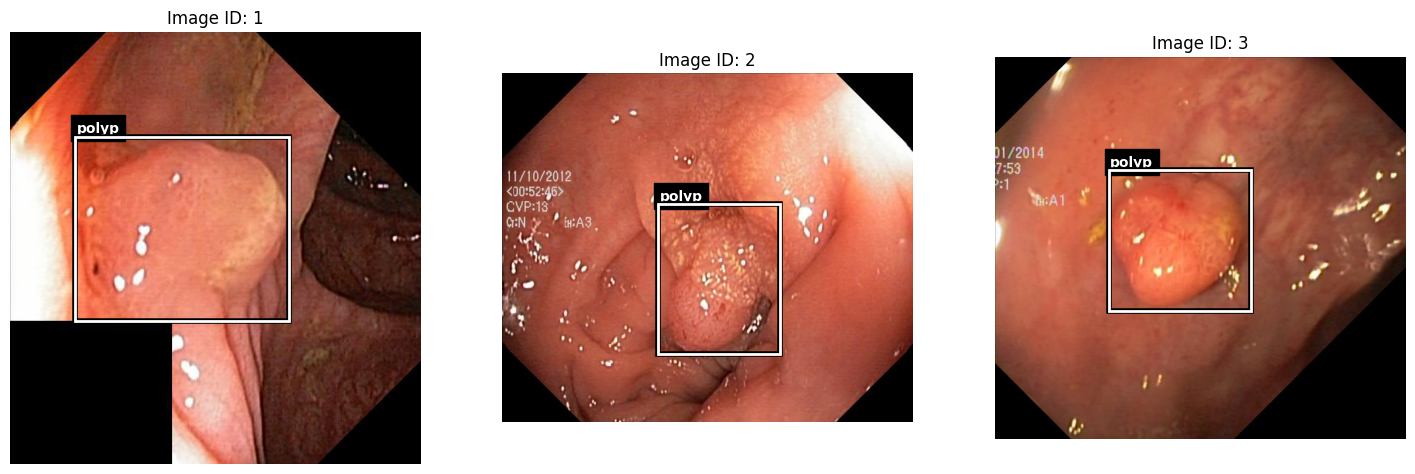

In [5]:
# Util functions not in the article but used to render images.
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image


def display_image_with_bboxes(ax, image_id, images_df, images_path, bbox_df=None, id2label=None):
    image_filename = images_df.query("image_id == @image_id").iloc[0]["file_name"]
    image = Image.open(images_path + '/' + image_filename).convert("RGB")

    ax.imshow(image)
    ax.axis("off")
    if bbox_df is not None:
        bboxes = bbox_df.query("image_id == @image_id")[["xmin", "ymin", "xmax", "ymax"]].values
        labels = bbox_df.query("image_id == @image_id")["label_id"].values
        for i in range(bboxes.shape[0]):
            bbox = bboxes[i, :]
            bot_left = (bbox[0], bbox[1])
            width = bbox[2] - bbox[0]
            height = bbox[3] - bbox[1]

            if id2label is not None:
                label = id2label.get(labels[i], "unknown")
                ax.text(
                    bbox[0]+2,
                    bbox[1]-2,
                    label,
                    color="white",
                    verticalalignment="bottom",
                    horizontalalignment="left",
                    fontsize="medium",
                    fontweight="bold",
                    bbox=dict(facecolor="black", edgecolor=None),
                    zorder=1
                )

                outer_box = patches.Rectangle(
                    bot_left, width, height, linewidth=4, edgecolor="black", fill=False, zorder=2
                )
                inner_box = patches.Rectangle(
                    bot_left, width, height, linewidth=2, edgecolor="white", fill=False, zorder=3
                )
                # Add the patch to the Axes
                ax.add_patch(outer_box)
                ax.add_patch(inner_box)
    
def get_utils_variables(data_path=DATA_PATH):
    images_path = '/content/drive/MyDrive/BSc_Project/Val_300/images'
    annotations_path = '/content/drive/MyDrive/BSc_Project/Kvasir-SEG/annotation/Val_300.json'

    with open(annotations_path, "r") as f:
        targets_json = json.load(f)
    
    id2label = {cat["id"]: cat["name"] for cat in targets_json["categories"]}
    return images_path, id2label

images_path, id2label = get_utils_variables()
plt.figure(figsize=(18,6))
image_ids = [1, 2, 3]
for i, image_id in enumerate(image_ids):
    ax = plt.subplot(131+i)
    display_image_with_bboxes(ax, image_id, images_df, images_path, targets_df, id2label);
    plt.title(f"Image ID: {image_id}")

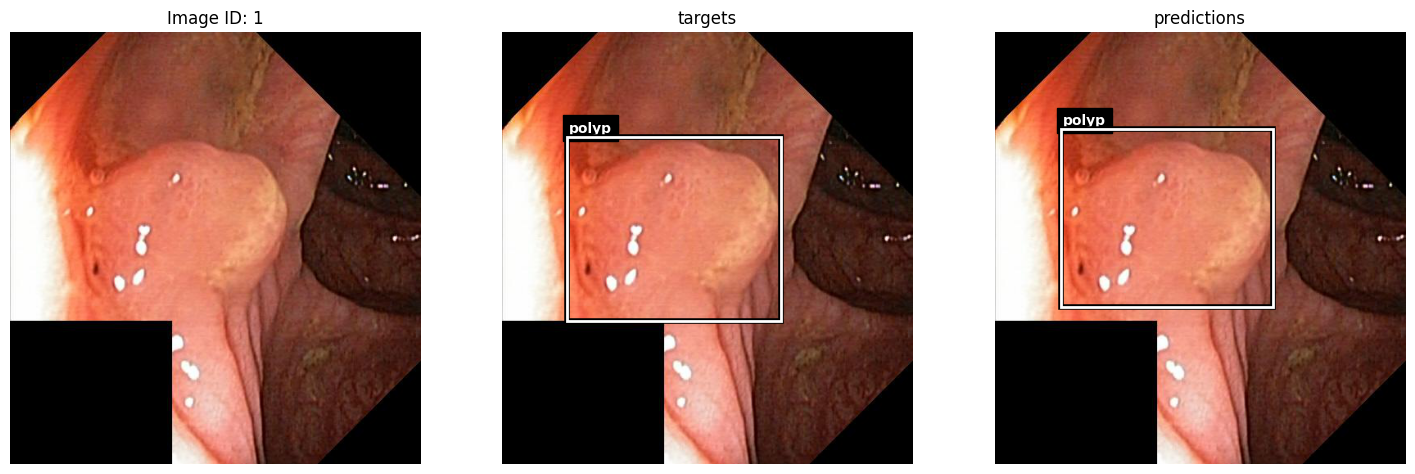

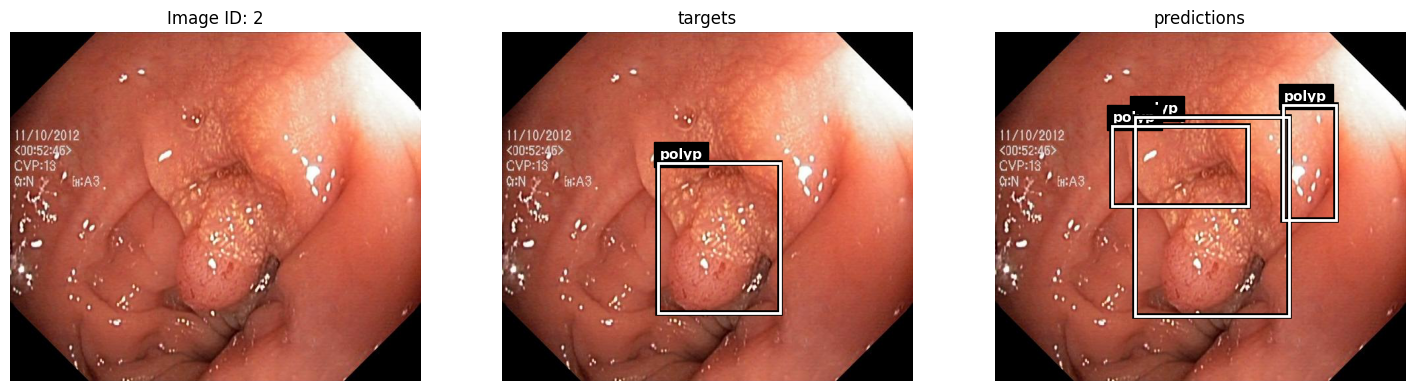

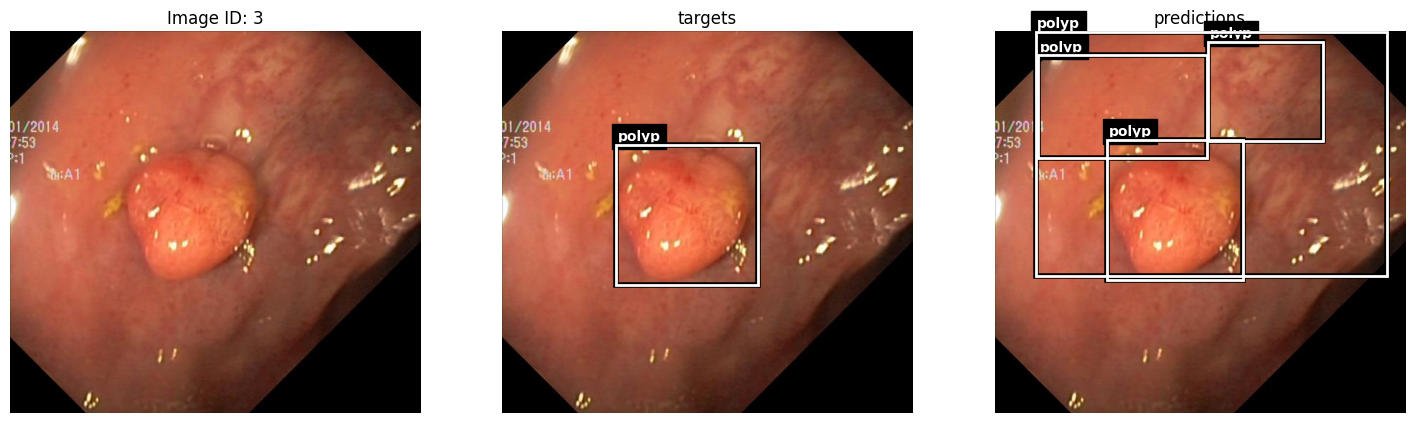

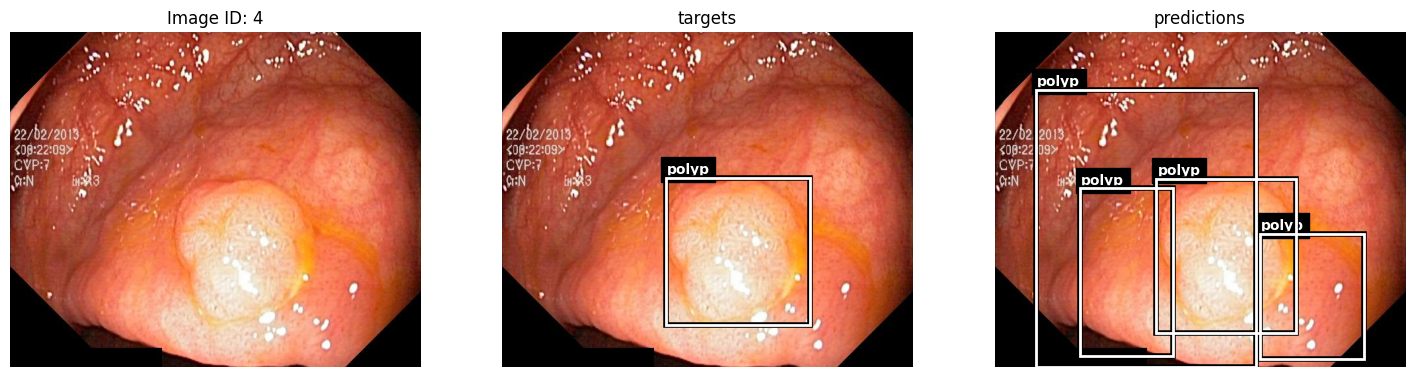

In [6]:
# Code not present in the article but used behind the scenes to get the plots
image_ids = [i for i in range(1, 5)]  # IDs found manually in the necessary loss ranges
for image_id in image_ids:
    plt.figure(figsize=(18,6))
    ax = plt.subplot(131)
    display_image_with_bboxes(ax, image_id, images_df, images_path, id2label=id2label);
    plt.title(f"Image ID: {image_id}")
    ax = plt.subplot(132)
    display_image_with_bboxes(ax, image_id, images_df, images_path, targets_df, id2label);
    plt.title("targets")
    ax = plt.subplot(133)
    display_image_with_bboxes(ax, image_id, images_df, images_path, preds_df, id2label);
    plt.title("predictions")

